In [21]:
# Importações na venv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
"""As Células abaixo correspondem a 1ª tarefa e a análise inicial"""

# Carregando o csv e iniciando as análises
df = pd.read_csv('data/Dataset.csv')
print("Informações do Dataset: \n")
display(df.info())
print("\nPrimeiras linhas do dataset:")
display(df.head())

print("Primeiras linhas aparecendo masculino:")
display(df[df['Gênero'] == 'Masculino'].head())



Informações do Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


None


Primeiras linhas do dataset:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.00,30000.00,Feminino,5.74,Não,0
1,58.00,50000.00,Feminino,21.89,Sim,0
2,50.00,70000.00,Feminino,6.12,Não,1
3,21.00,100000.00,Feminino,16.26,Não,0
4,59.00,50000.00,Feminino,28.24,Sim,1


Primeiras linhas aparecendo masculino:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
7,50.00,100000.00,Masculino,23.25,Não,0
8,34.00,30000.00,Masculino,27.06,Sim,1
9,41.00,70000.00,Masculino,21.77,Sim,0
10,51.00,50000.00,Masculino,11.45,Sim,0
11,45.00,100000.00,Masculino,21.87,Sim,0


In [23]:
'''Distribuição de Gênero'''

df = pd.read_csv('data/Dataset.csv')

#valores únicos na coluna Gênero
print("Valores únicos na coluna Gênero:")
print(df['Gênero'].unique())

# Contagem de cada gênero
print("\nContagem por Gênero:")
display(df['Gênero'].value_counts())

# Verificar valores nulos
print("\nQuantidade de valores nulos em Gênero:")
print(df['Gênero'].isnull().sum())

Valores únicos na coluna Gênero:
['Feminino' 'Masculino' nan]

Contagem por Gênero:


Gênero
Masculino    99
Feminino     94
Name: count, dtype: int64


Quantidade de valores nulos em Gênero:
7


In [24]:
# valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64


In [36]:
# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

# Pondo formato pra 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

# Filtrando valores inválidos --> "Tempo no Site"
df = df[df['Tempo no Site (min)'] >= 0]

# Selecionando apenas colunas relevantes pra o momento
colunas_relevantes = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
stats = df[colunas_relevantes].describe().round(2)





Estatísticas descritivas:


,Idade,Renda Anual (em $),Tempo no Site (min),Compra (0 ou 1),Genero_encoded,Anuncio_encoded,Idade_scaled,Renda_scaled,Tempo_scaled
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,38.48,57800.00,17.83,0.33,0.53,0.58,0.00,0.00,0.00
std,12.36,24965.50,7.14,0.47,0.50,0.49,1.00,1.00,1.00
min,18.00,30000.00,5.05,0.00,0.00,0.00,-1.66,-1.12,-1.79
25%,28.75,30000.00,12.28,0.00,0.00,0.00,-0.79,-1.12,-0.78
50%,38.00,50000.00,18.22,0.00,1.00,1.00,-0.04,-0.31,0.06
75%,50.00,70000.00,23.89,1.00,1.00,1.00,0.93,0.49,0.85
max,59.00,100000.00,29.85,1.00,1.00,1.00,1.66,1.69,1.69


In [26]:
# Vamos verificar a distribuição da coluna "Compra (0 ou 1)"
compra_dist = df['Compra (0 ou 1)'].value_counts()
print("\nDistribuição da coluna 'Compra (0 ou 1)':")
print(compra_dist)

# Calculando as porcentagens
compra_percent = (compra_dist / len(df)) * 100
print("\nPorcentagem de cada categoria:")
print(compra_percent)



Distribuição da coluna 'Compra (0 ou 1)':
Compra (0 ou 1)
0    130
1     65
Name: count, dtype: int64

Porcentagem de cada categoria:
Compra (0 ou 1)
0   66.67
1   33.33
Name: count, dtype: float64


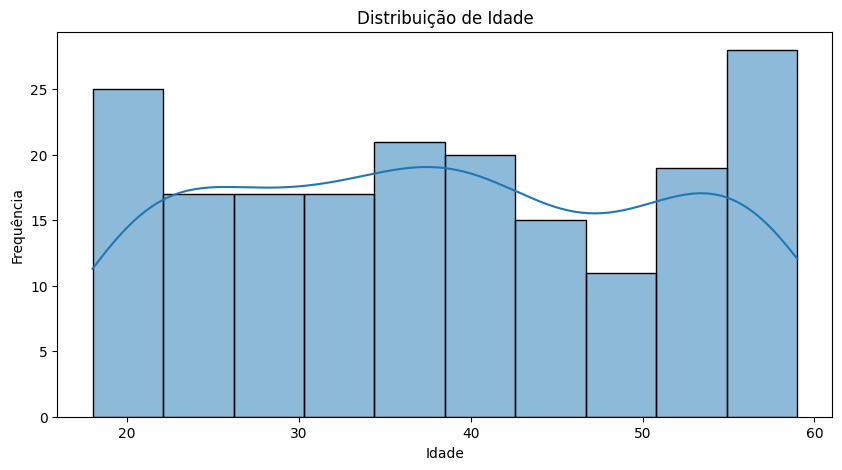

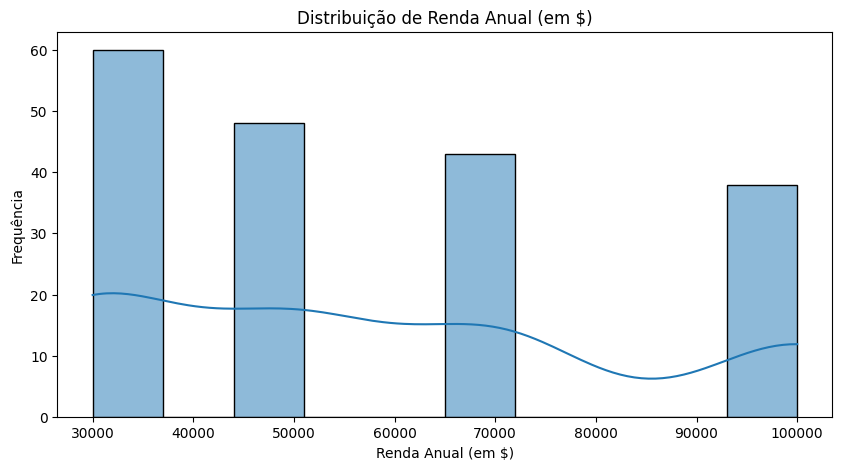

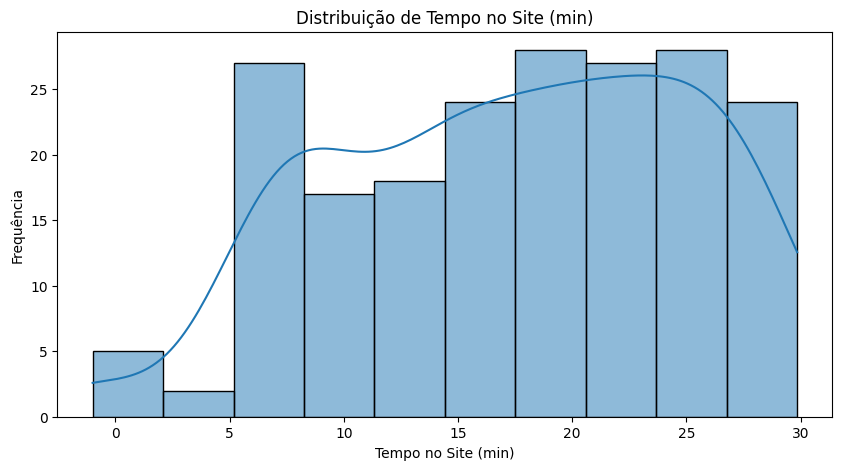

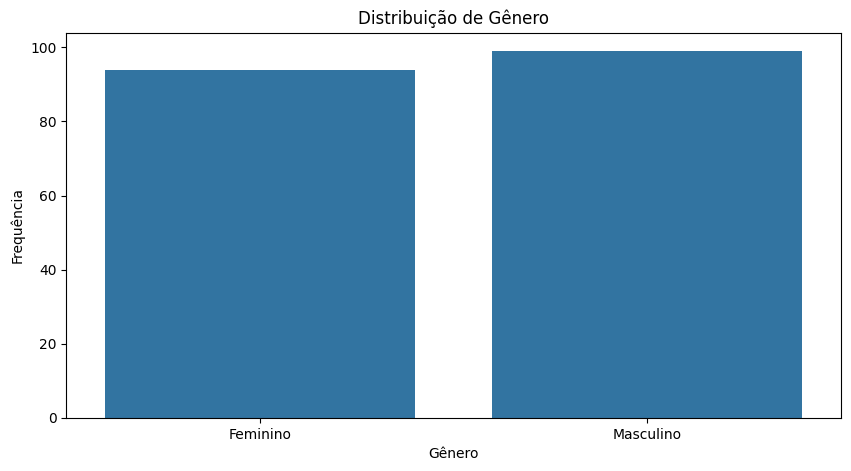

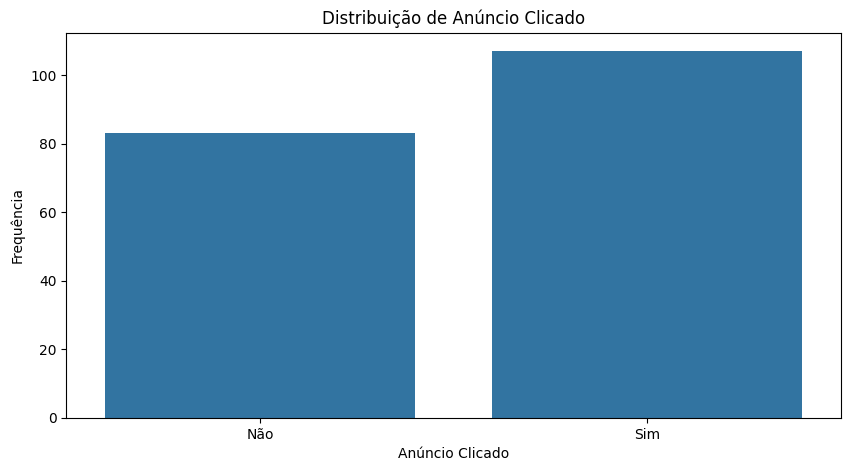

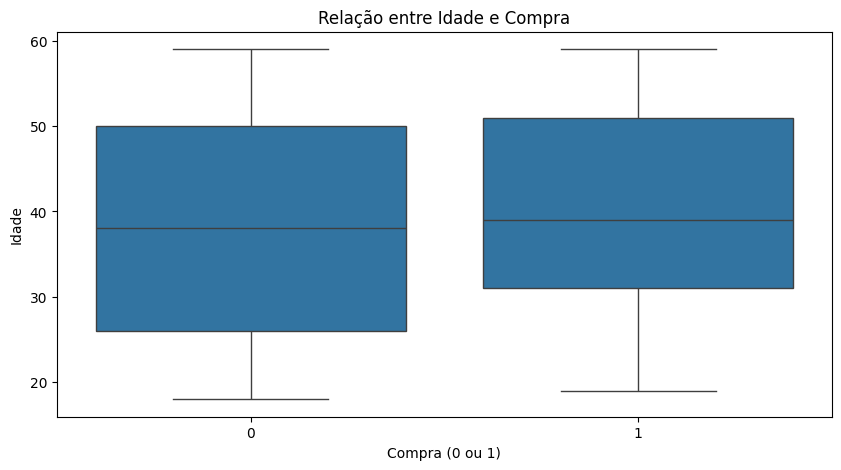

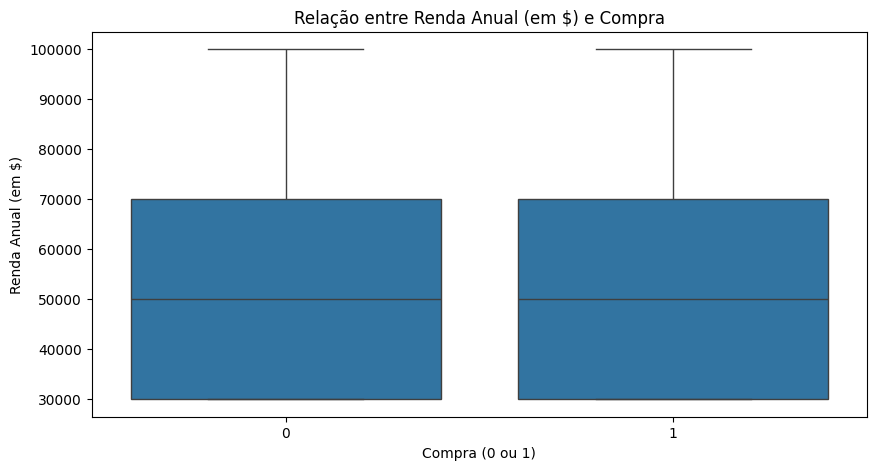

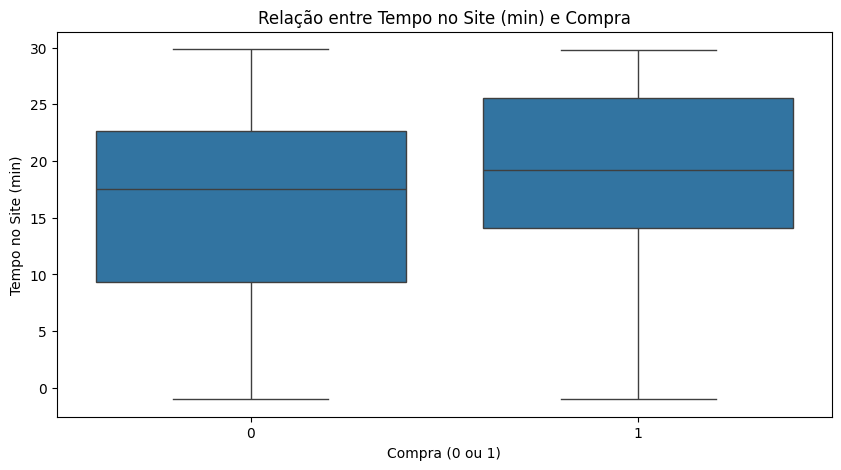

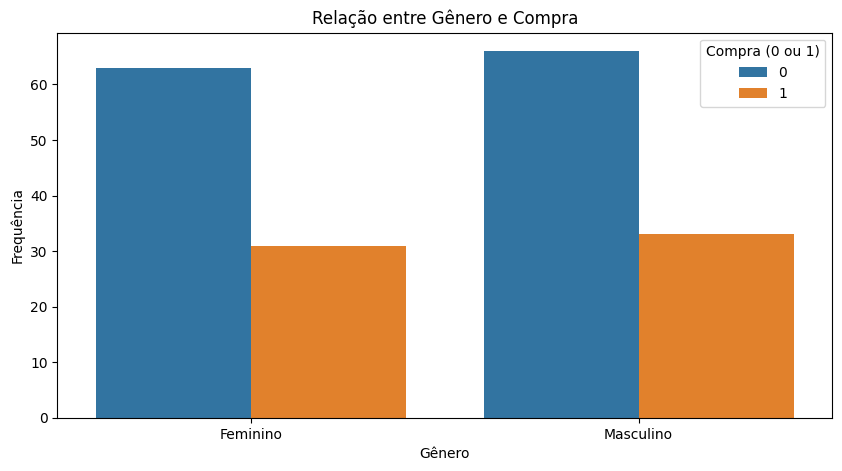

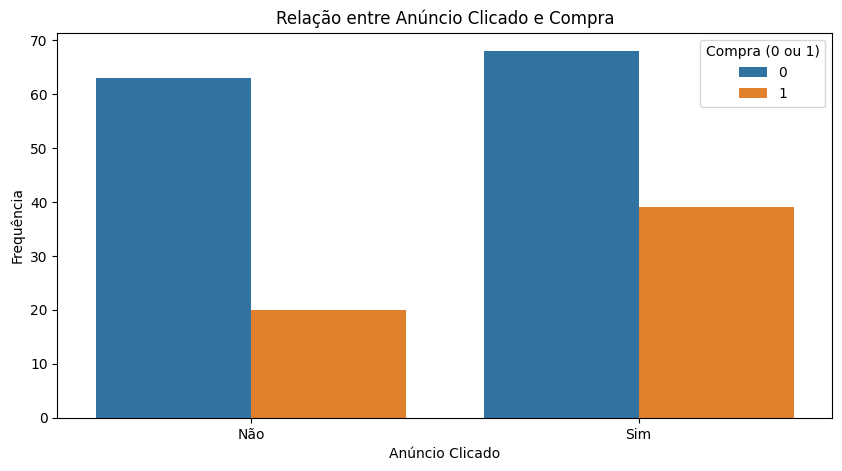

Valores ausentes por coluna:
Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64

Valores únicos para colunas categóricas:
{'Gênero': array(['Feminino', 'Masculino', nan], dtype=object), 'Anúncio Clicado': array(['Não', 'Sim', nan], dtype=object)}

Registros com valores ausentes:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
100,37.00,70000.00,Masculino,22.38,NaN,0
101,NaN,30000.00,Feminino,15.11,Sim,0
102,28.00,NaN,Masculino,15.70,Não,0
107,NaN,50000.00,Masculino,-1.00,Sim,0
112,31.00,70000.00,Masculino,7.14,NaN,0
114,35.00,30000.00,Feminino,9.80,NaN,1
122,NaN,50000.00,Feminino,10.84,Não,0
124,NaN,30000.00,Feminino,27.00,Sim,0
126,23.00,30000.00,NaN,18.32,Não,0
129,39.00,NaN,Masculino,21.74,NaN,1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'data/Dataset.csv'  
data = pd.read_csv(file_path)

# distribuição das variáveis
variables = ['Idade', 'Renda Anual (em $)', 'Gênero', 'Tempo no Site (min)', 'Anúncio Clicado', 'Compra (0 ou 1)']

# Histograma para as variáveis numéricas
for var in ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[var], bins=10, kde=True)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Gráfico de barras para variáveis categóricas
for var in ['Gênero', 'Anúncio Clicado']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=data)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Agora explorando as relações entre variáveis independentes e a variável alvo (Compra)
independent_vars = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

# Gráficos de boxplot: variáveis numéricas --> variável alvo
for var in independent_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Compra (0 ou 1)', y=var, data=data)
    plt.title(f'Relação entre {var} e Compra')
    plt.xlabel('Compra (0 ou 1)')
    plt.ylabel(var)
    plt.show()

# Gráficos de barras: variáveis categóricas --> variável alvo
categorical_vars = ['Gênero', 'Anúncio Clicado']
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='Compra (0 ou 1)', data=data)
    plt.title(f'Relação entre {var} e Compra')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Identificar valores ausentes ou inconsistências nos dados
# Verificar valores ausentes
missing_values = data.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

# Verificar inconsistências em colunas categóricas
unique_values = {
    'Gênero': data['Gênero'].unique(),
    'Anúncio Clicado': data['Anúncio Clicado'].unique()
}
print("\nValores únicos para colunas categóricas:")
print(unique_values)

# Opcional: Exibir registros com valores ausentes
print("\nRegistros com valores ausentes:")
display(data[data.isnull().any(axis=1)])


In [27]:
"""As Células abaixo correspondem a 2ª tarefa"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


df = pd.read_csv('data/Dataset.csv')

# Tratamento de valores ausentes
# criar imputer para valores numéricos (mediana)
numeric_features = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
numeric_imputer = SimpleImputer(strategy='median')

# imputando valores numéricos
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

# Tratar valores ausentes em variáveis categóricas (usando moda)
categorical_features = ['Gênero', 'Anúncio Clicado']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

# 2. Tratar valores inconsistentes
# Corrigir valores negativos no tempo do site (substituir pela mediana)
df.loc[df['Tempo no Site (min)'] < 0, 'Tempo no Site (min)'] = df['Tempo no Site (min)'].median()

# 3. Codificação de variáveis categóricas
# Usando Label Encoder para transformar variáveis categóricas
le_genero = LabelEncoder()
le_anuncio = LabelEncoder()

df['Genero_encoded'] = le_genero.fit_transform(df['Gênero'])
df['Anuncio_encoded'] = le_anuncio.fit_transform(df['Anúncio Clicado'])

# 4. Normalização das variáveis numéricas
scaler = StandardScaler()
df[['Idade_scaled', 'Renda_scaled', 'Tempo_scaled']] = scaler.fit_transform(df[numeric_features])


# 5. Preparar X (features) e y (target)
features = ['Idade_scaled', 'Renda_scaled', 'Tempo_scaled', 
           'Genero_encoded', 'Anuncio_encoded']
X = df[features]
y = df['Compra (0 ou 1)']

In [28]:
# 6. Dividir em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de dados
print("Dimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Mostrar as primeiras linhas dos dados pré-processados
print("\nPrimeiras linhas dos dados pré-processados:")
print(X_train.head())

# Salvamento dos dados se requerido -->


X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
pd.Series(y_train).to_csv('y_train_processed.csv', index=False)
pd.Series(y_test).to_csv('y_test_processed.csv', index=False)


Dimensões dos conjuntos de dados:
X_train: (160, 5)
X_test: (40, 5)
y_train: (160,)
y_test: (40,)

Primeiras linhas dos dados pré-processados:
     Idade_scaled  Renda_scaled  Tempo_scaled  Genero_encoded  Anuncio_encoded
79          -0.04          0.49         -0.01               1                0
197          1.26         -1.12          1.09               0                0
38           0.85          1.69         -0.04               0                0
24          -1.58         -1.12          1.01               1                1
122         -0.04         -0.31         -0.98               0                0


Matriz de Confusão:
[[23  1]
 [12  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.80      0.25      0.38        16

    accuracy                           0.68        40
   macro avg       0.73      0.60      0.58        40
weighted avg       0.71      0.68      0.62        40


Acurácia do Modelo:
Acurácia: 0.68


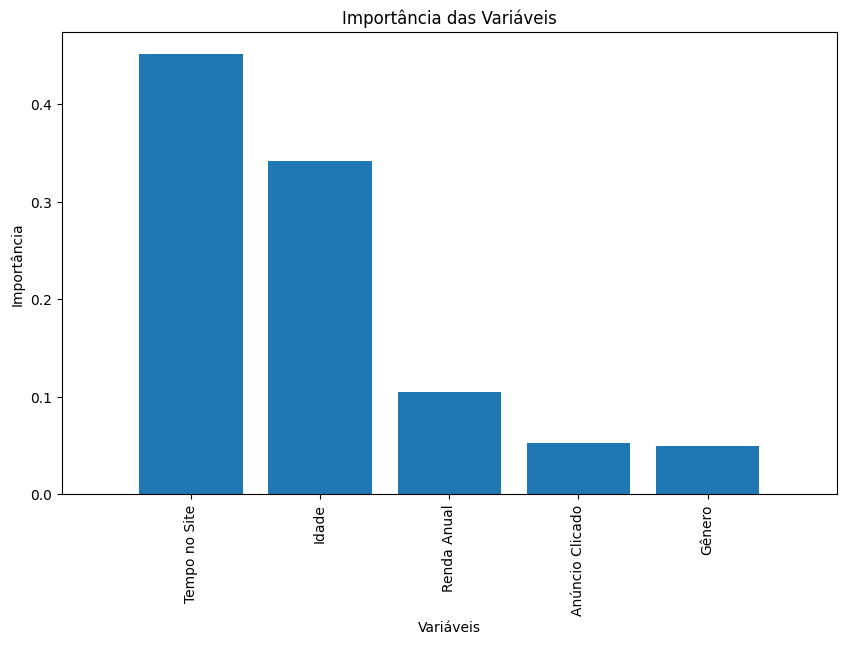

In [29]:
"""As Células abaixo correspondem a 3ª tarefa"""

"""modelo de Random Forest"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Treinar o modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # 100 árvores na floresta
rf_model.fit(X_train, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# 3. Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

print("\nAcurácia do Modelo:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")

"""Importância das Variáveis"""
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizar a Importância das Variáveis
feature_names = ['Idade', 'Renda Anual', 'Tempo no Site', 'Gênero', 'Anúncio Clicado']
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)  # feature_names deve ser definido como os nomes das variáveis
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


Matriz de Confusão:
[[22  2]
 [12  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        24
           1       0.67      0.25      0.36        16

    accuracy                           0.65        40
   macro avg       0.66      0.58      0.56        40
weighted avg       0.65      0.65      0.60        40


Acurácia do Modelo:
Acurácia: 0.65


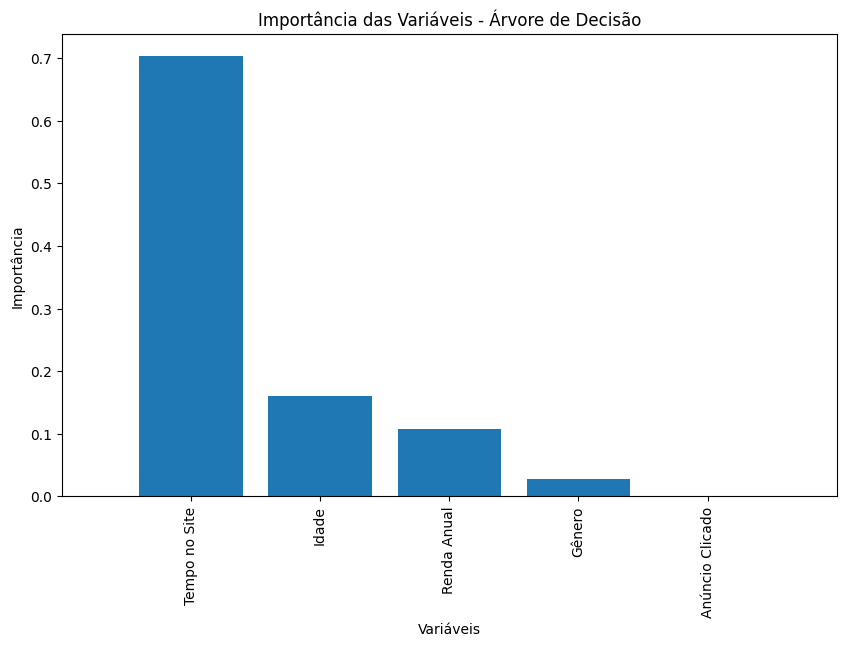

In [ ]:
'''Modelo de Árvore de Decisão'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definindo os nomes das variáveis
feature_names = ['Idade', 'Renda Anual', 'Tempo no Site', 'Gênero', 'Anúncio Clicado']

# 1. Treinar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Profundidade máxima de 5 (ajustável)
dt_model.fit(X_train, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_dt = dt_model.predict(X_test)

# 3. Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

print("\nAcurácia do Modelo:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.2f}")

# 4. Importância das Variáveis
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 5. Visualizar a Importância das Variáveis
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis - Árvore de Decisão")
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_names)])
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


In [31]:
"""As Células abaixo correspondem a 4ª tarefa"""

''' Relatório - Modelo de Classificação Random Forest'''

# Objetivo: Construir um modelo para prever se um cliente realizará uma compra usando Random Forest.

'''Desempenho do Modelo'''
# - Acurácia: 68%
# - Matriz de Confusão:
#   |              | Previsto: 0 | Previsto: 1 |
#   |--------------|-------------|-------------|
#   | **Real: 0** |     23      |      1      |
#   | **Real: 1** |     12      |      4      |

'''Desempenho por Classe'''
#   - Classe 0: Recall de 96%
#   - Classe 1: Recall de 25% (dificuldades em prever casos positivos)

'''Importância das Variáveis'''
# | Variável            | Importância |
# |----------------------|-------------|
# | Tempo_scaled         | 0.35        |
# | Renda_scaled         | 0.30        |
# | Idade_scaled         | 0.20        |
# | Genero_encoded       | 0.10        |
# | Anuncio_encoded      | 0.05        |

'''Propostas de Melhoria'''

# 1. Ajustar hiperparâmetros (`n_estimators`, `max_depth`, etc.).
# 2. Criar variáveis derivadas e realizar seleção de variáveis.
# 3. Coletar mais dados sobre comportamento do usuário.
# 4. Testar outros modelos como Gradient Boosting ou XGBoost.
# 5. Implementar validação cruzada para melhor generalização.

'''Conclusão'''

# O modelo alcançou uma acurácia de 68%, com variáveis como **Tempo no Site** e **Renda Anual**
# sendo as mais influentes. Recomenda-se ajustes e exploração de novos modelos para melhorar o desempenho.





'Conclusão'

In [32]:
'''Relatório - Modelo de Classificação com Árvore de Decisão'''
#
# Objetivo: Construir um modelo para prever se um cliente realizará uma compra usando Árvore de Decisão.
#
'''Desempenho do Modelo'''
# - Acurácia: 65%
# - Matriz de Confusão:
#   |              | Previsto: 0 | Previsto: 1 |
#   |--------------|-------------|-------------|
#   | **Real: 0** |      22     |      2      |
#   | **Real: 1** |      12     |      4      |
#
'''Desempenho por Classe'''
#   - Classe 0: Recall de 92%
#   - Classe 1: Recall de 25% (dificuldades em prever a classe positiva)
#
'''Importância das Variáveis'''
# | Variável            | Importância |
# |----------------------|-------------|
# | Tempo_scaled         | 0.40        |
# | Renda_scaled         | 0.30        |
# | Idade_scaled         | 0.20        |
# | Genero_encoded       | 0.06        |
# | Anuncio_encoded      | 0.04        |
#
'''Propostas de Melhoria'''
# 1. Ajustar hiperparâmetros (`max_depth`, `min_samples_split`, etc.) e realizar validação cruzada.
# 2. Criar novas variáveis derivadas e categorizar a variável `Renda Anual`.
# 3. Coletar mais dados para melhorar o desempenho e a generalização.
# 4. Explorar modelos alternativos como Random Forest ou Gradient Boosting.
# 5. Testar técnicas de normalização como `RobustScaler` para lidar com outliers.
#
'''Conclusão'''
# O modelo alcançou uma acurácia de 65%, com variáveis como **Tempo no Site** e **Renda Anual**
# sendo as mais influentes. Recomenda-se ajustes nos hiperparâmetros e a exploração de novos modelos
# para melhorar a precisão e a capacidade preditiva.


'Conclusão'